<a href="https://colab.research.google.com/github/fathanzys/Data/blob/main/uas_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Latar Belakang**

#**1. Data Collection**

###**1.1 Import Drive**

In [2]:
# 1.1 Mount Google Drive (jika menggunakan Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**1.2 Import Library & Dataset**

In [3]:
# 1.2 Import library yang dibutuhkan
import pandas as pd
import numpy as np

file_path = "/content/drive/MyDrive/DM/salaries.csv"  # Ganti sesuai lokasi file kamu
df = pd.read_csv(file_path)

##**1.3 Cek Awal Data**

In [4]:
# 1.3 Cek ukuran dan tampilkan 5 baris pertama
print("Jumlah baris & kolom:", df.shape)

Jumlah baris & kolom: (141566, 11)


In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M


##**1.4 Deskripsi Kolom**

| Kolom                | Deskripsi                                                           |
| -------------------- | ------------------------------------------------------------------- |
| `work_year`          | Tahun kerja (contoh: 2023, 2024, 2025)                              |
| `experience_level`   | Tingkat pengalaman (EN: Entry, MI: Mid, SE: Senior, EX: Executive)  |
| `employment_type`    | Jenis pekerjaan (FT: Full-time, PT: Part-time, Contract, Freelance) |
| `job_title`          | Judul pekerjaan (misal: Data Scientist, AI Engineer, dll.)          |
| `salary`             | Gaji asli (dalam mata uang lokal)                                   |
| `salary_currency`    | Mata uang dari gaji (`salary`)                                      |
| `salary_in_usd`      | Gaji dalam USD (sudah dikonversi)                                   |
| `employee_residence` | Lokasi tempat tinggal karyawan                                      |
| `remote_ratio`       | Persentase remote working (0, 50, 100)                              |
| `company_location`   | Lokasi perusahaan                                                   |
| `company_size`       | Ukuran perusahaan (S: Small, M: Medium, L: Large)                   |


#**2. Pre Processing**

##**2.1 Cek Missing Value**

In [6]:
# 2.1 Cek missing values
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

Jumlah missing values per kolom:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


##**2.2 Cek Tipe Data Tiap Kolom**

In [7]:
# 2.3 Cek tipe data masing-masing kolom
print("\nTipe data kolom:")
print(df.dtypes)


Tipe data kolom:
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


##**2.3 Transformasi**

In [8]:
# 2.3 Ubah kolom objek menjadi kategori untuk efisiensi
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].astype('category')

#**3. EDA**

##**3.1 Distribusi Gaji dalam USD**

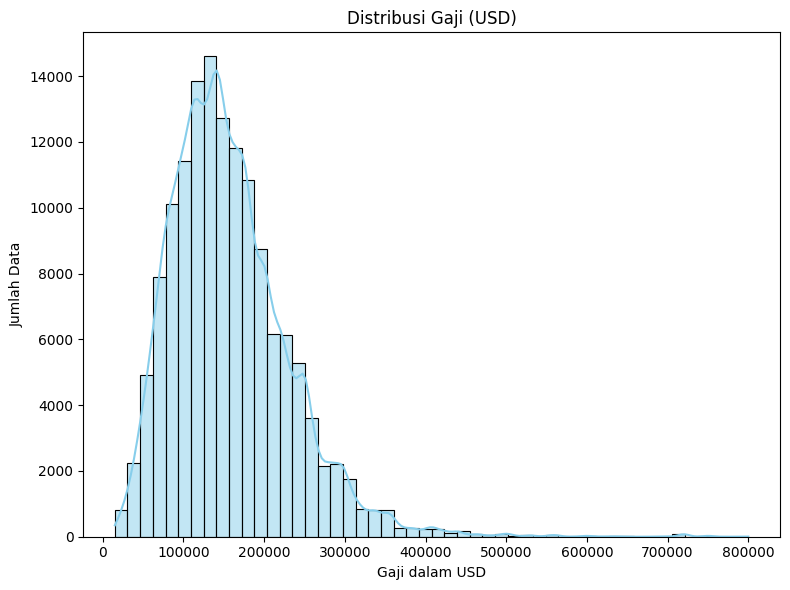

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1 Visualisasi distribusi gaji dalam USD
plt.figure(figsize=(8, 6))
sns.histplot(df['salary_in_usd'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Gaji (USD)')
plt.xlabel('Gaji dalam USD')
plt.ylabel('Jumlah Data')
plt.tight_layout()
plt.show()

##**3.2 Mapping Tingkat Pengalaman**

In [10]:
# 3.2 Mapping singkatan level pengalaman ke bentuk lengkap
experience_mapping = {
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior-level',
    'EX': 'Executive-level'
}

df['experience_level_full'] = df['experience_level'].map(experience_mapping)

##**3.3 Visualisasi boxplot berdasarkan tingkat pengalaman**

/tmp/ipython-input-11-4098195772.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level_full', y='salary_in_usd', data=df, order=order, palette='pastel')


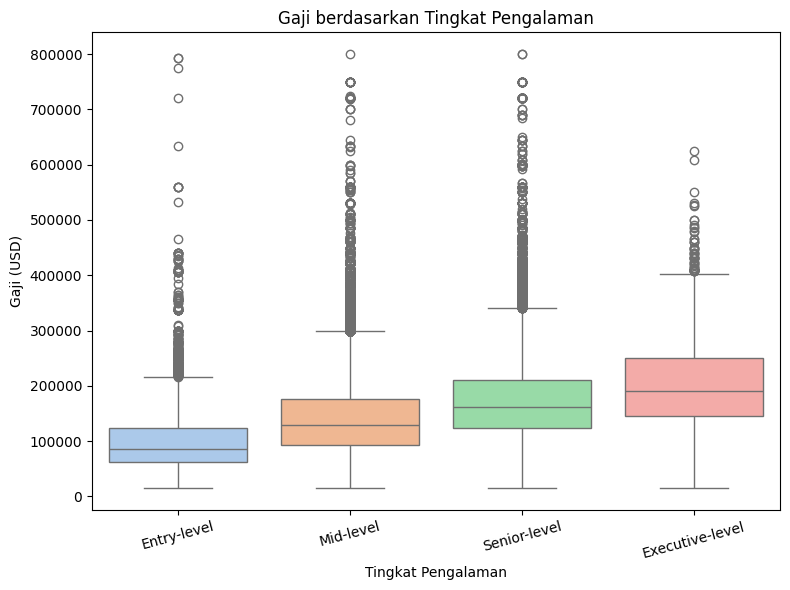

In [11]:
# 3.3 Visualisasi boxplot berdasarkan tingkat pengalaman
plt.figure(figsize=(8, 6))
order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']  # urutan logis
sns.boxplot(x='experience_level_full', y='salary_in_usd', data=df, order=order, palette='pastel')
plt.title("Gaji berdasarkan Tingkat Pengalaman")
plt.xlabel("Tingkat Pengalaman")
plt.ylabel("Gaji (USD)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

##3. Rata-rata Gaji Tahunan Tertinggi per Negara untuk 5 Job Title Utama**

In [12]:
# Daftar 5 job title yang akan dianalisis
job_titles = [
    "AI Engineer",
    "Machine Learning Engineer",
    "Data Scientist",
    "Data Analyst",
    "Data Engineer"
]

# Untuk tiap job title, tampilkan 5 negara dengan rata-rata gaji tertinggi
for title in job_titles:
    print(f"\Top 5 Countries with Highest Average Salary for: {title}")
    top_countries = (
        df[df['job_title'] == title]
        .groupby('company_location')['salary_in_usd']
        .mean()
        .sort_values(ascending=False)
        .head(5)
    )
    print(top_countries)

\Top 5 Countries with Highest Average Salary for: AI Engineer
company_location
QA    300000.000000
US    183467.241709
UA    143500.000000
JP    139813.000000
CA    135712.255814
Name: salary_in_usd, dtype: float64
\Top 5 Countries with Highest Average Salary for: Machine Learning Engineer
company_location
UA    230000.000000
SG    212500.000000
AU    207912.689655
US    204103.827497
PR    167500.000000
Name: salary_in_usd, dtype: float64
\Top 5 Countries with Highest Average Salary for: Data Scientist
company_location
US    162880.323959
SG    158100.000000
BG    152500.000000
CH    152256.666667
CA    140711.333333
Name: salary_in_usd, dtype: float64
\Top 5 Countries with Highest Average Salary for: Data Analyst
company_location
IL    135000.000000
US    110466.774478
AU    109841.011628
MX    100905.777778
NZ     99086.200000
Name: salary_in_usd, dtype: float64
\Top 5 Countries with Highest Average Salary for: Data Engineer
company_location
PR    167500.000000
US    155017.059692
B

/tmp/ipython-input-12-2139911240.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('company_location')['salary_in_usd']


#**4. Feature Engineering**

##**4.1 Klasifikasi Gaji: salary_level (Low, Medium, High)**

In [13]:
# 4.1 Membuat kolom salary_level berdasarkan rentang salary_in_usd
df['salary_level'] = pd.cut(df['salary_in_usd'],
                            bins=[0, 50000, 100000, float('inf')],
                            labels=['low', 'medium', 'high'])

##**4.2 Kombinasi: Pengalaman + Remote Ratio**

In [14]:
# 4.2 Buat kombinasi level pengalaman dan remote ratio
df['exp_remote'] = df['experience_level'].astype(str) + '_' + df['remote_ratio'].astype(str)

##**4.3 Encoding Kombinasi (exp_remote_enc)**

In [15]:
from sklearn.preprocessing import LabelEncoder

# Label encoding kombinasi exp_remote
df['exp_remote_enc'] = LabelEncoder().fit_transform(df['exp_remote'])

##**4.4 Cek Distribusi Kelas Target**

salary_level
high      109363
medium     28069
low         4134
Name: count, dtype: int64


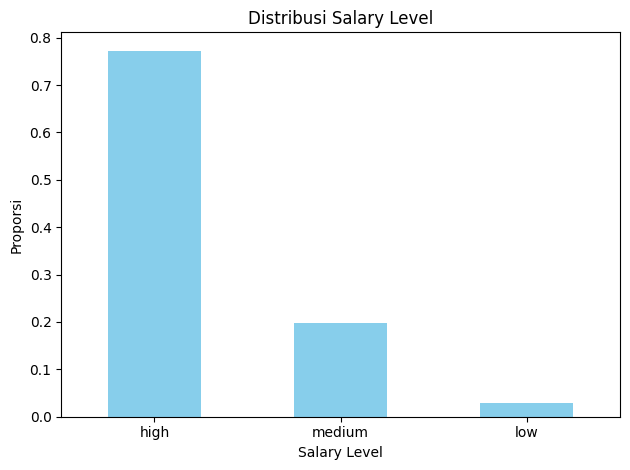

In [16]:
# 4.4 Lihat distribusi jumlah salary_level
print(df['salary_level'].value_counts())

# Plot distribusi
df['salary_level'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title("Distribusi Salary Level")
plt.ylabel("Proporsi")
plt.xlabel("Salary Level")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##**4.5 Normalisasi Gaji**

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi kolom salary_in_usd (0–1)
scaler = MinMaxScaler()
df['salary_norm'] = scaler.fit_transform(df[['salary_in_usd']])

##**4.6 Encoding Semua Kolom Kategorikal**

In [18]:
# 4.6 Encode semua kolom kategorikal utama
categorical_cols = ['job_title', 'company_location', 'employment_type', 'experience_level', 'remote_ratio']
le = LabelEncoder()

for col in categorical_cols:
    df[col + '_enc'] = le.fit_transform(df[col])

#**5. Encode & Split**

In [19]:
# 5.1 Tentukan fitur dan target
# Kita gunakan fitur yang sudah di-encode dan engineered

feature_cols = [
    'job_title_enc', 'company_location_enc', 'employment_type_enc',
    'experience_level_enc', 'remote_ratio', 'exp_remote_enc'
]

X = df[feature_cols]
y = df['salary_level']  # target klasifikasi: low, medium, high

In [20]:
# Encode target label (low, medium, high → 0, 1, 2)
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split

# Split 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Cek ukuran
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (113252, 6)
Test size: (28314, 6)


#**6. Model Training**

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi dan training
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_dt = dt_model.predict(X_test)

print("🔎 Decision Tree Performance")
print(classification_report(y_test, y_pred_dt, target_names=le_target.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

🔎 Decision Tree Performance
              precision    recall  f1-score   support

        high       0.86      0.95      0.90     21873
         low       0.65      0.43      0.52       827
      medium       0.59      0.38      0.46      5614

    accuracy                           0.82     28314
   macro avg       0.70      0.58      0.63     28314
weighted avg       0.80      0.82      0.80     28314

Accuracy: 0.8192060464787737


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi dan training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf, target_names=le_target.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Performance
              precision    recall  f1-score   support

        high       0.86      0.95      0.90     21873
         low       0.66      0.42      0.51       827
      medium       0.59      0.39      0.47      5614

    accuracy                           0.82     28314
   macro avg       0.70      0.58      0.63     28314
weighted avg       0.80      0.82      0.80     28314

Accuracy: 0.8193826375644557


In [24]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi dan training (gunakan solver='lbfgs' & multi_class='multinomial')
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Performance")
print(classification_report(y_test, y_pred_lr, target_names=le_target.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Performance
              precision    recall  f1-score   support

        high       0.82      0.96      0.88     21873
         low       0.33      0.02      0.03       827
      medium       0.50      0.24      0.33      5614

    accuracy                           0.79     28314
   macro avg       0.55      0.40      0.41     28314
weighted avg       0.74      0.79      0.75     28314

Accuracy: 0.7874549692731511


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#**7. Visualisasi**

##**7.7 Transformasi Informasi Countr7**

/tmp/ipython-input-26-1282693166.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('company_location')['salary_in_usd']


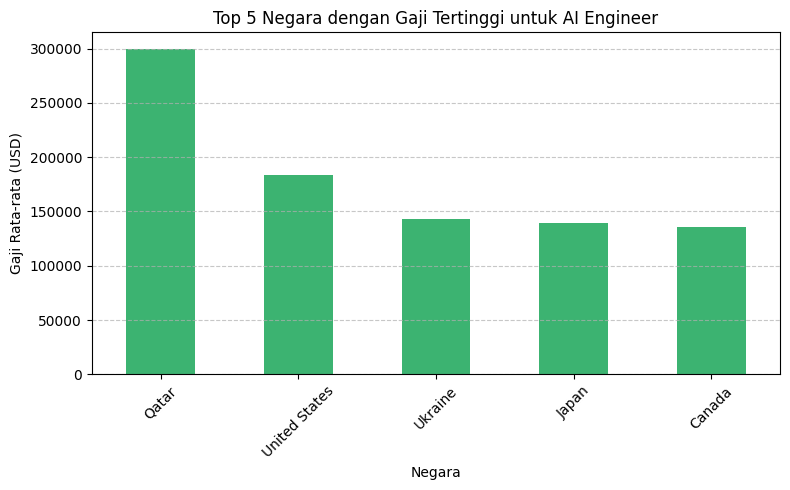

In [26]:
# Create a dictionary to map country codes to country names
country_name = {
    'QA': 'Qatar',
    'US': 'United States',
    'UA': 'Ukraine',
    'JP': 'Japan',
    'CA': 'Canada',
    'SG': 'Singapore',
    'AU': 'Australia',
    'PR': 'Puerto Rico',
    'BG': 'Bulgaria',
    'CH': 'Switzerland',
    'IL': 'Israel',
    'MX': 'Mexico',
    'NZ': 'New Zealand',
    'BE': 'Belgium'
}

title = "AI Engineer"
top_countries_ai = (
    df[df['job_title'] == title]
    .groupby('company_location')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

top_countries_ai.index = top_countries_ai.index.map(country_name)
# Visualisasi
plt.figure(figsize=(8, 5))
top_countries_ai.plot(kind='bar', color='mediumseagreen')
plt.title(f"Top 5 Negara dengan Gaji Tertinggi untuk {title}")
plt.xlabel("Negara")
plt.ylabel("Gaji Rata-rata (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-27-917096163.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('company_location')['salary_in_usd']


Top 5 Negara dengan Gaji Tertinggi untuk: Machine Learning Engineer
company_location
Ukraine          230000.000000
Singapore        212500.000000
Australia        207912.689655
United States    204103.827497
Puerto Rico      167500.000000
Name: salary_in_usd, dtype: float64


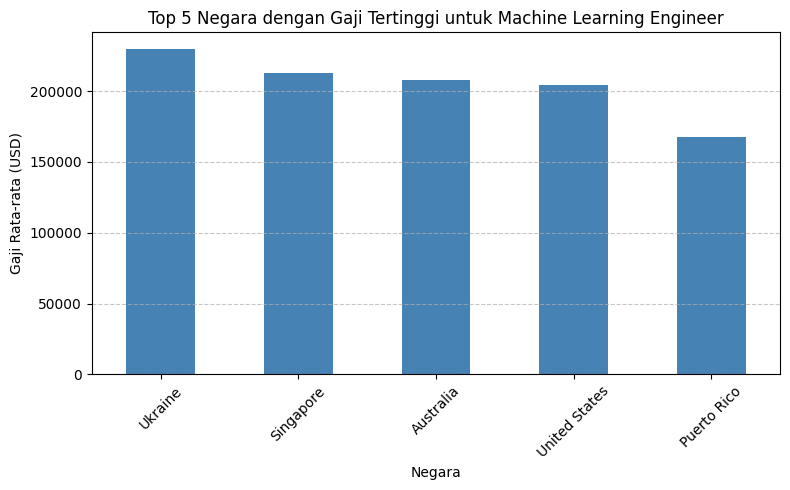

In [27]:
# Filter data untuk Machine Learning Engineer
title = "Machine Learning Engineer"
top_countries_ml = (
    df[df['job_title'] == title]
    .groupby('company_location')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

# Ubah kode negara ke nama lengkap
top_countries_ml.index = top_countries_ml.index.map(country_name)

# Tampilkan hasil
print(f"Top 5 Negara dengan Gaji Tertinggi untuk: {title}")
print(top_countries_ml)

# Visualisasi
plt.figure(figsize=(8, 5))
top_countries_ml.plot(kind='bar', color='steelblue')
plt.title(f"Top 5 Negara dengan Gaji Tertinggi untuk {title}")
plt.xlabel("Negara")
plt.ylabel("Gaji Rata-rata (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-28-2275054067.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('company_location')['salary_in_usd']


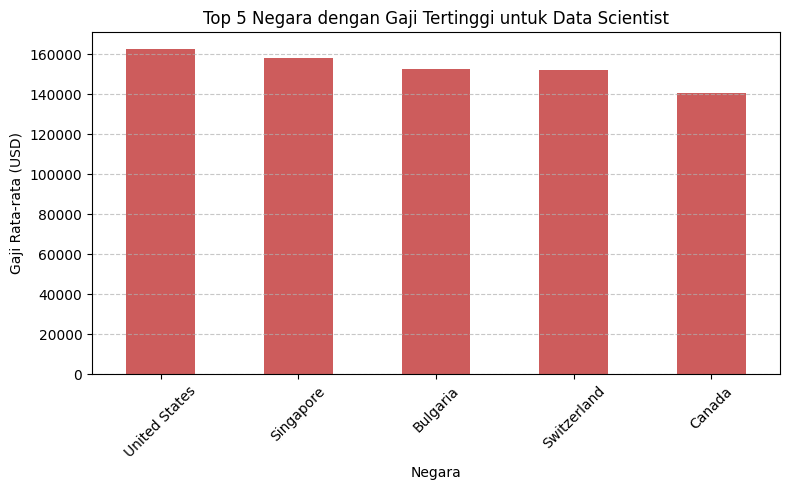

In [28]:
# Filter data untuk Data Scientist
title = "Data Scientist"
top_countries_ds = (
    df[df['job_title'] == title]
    .groupby('company_location')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

# Ubah kode negara ke nama lengkap
top_countries_ds.index = top_countries_ds.index.map(country_name)

# Visualisasi
plt.figure(figsize=(8, 5))
top_countries_ds.plot(kind='bar', color='indianred')
plt.title(f"Top 5 Negara dengan Gaji Tertinggi untuk {title}")
plt.xlabel("Negara")
plt.ylabel("Gaji Rata-rata (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-29-200462622.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('company_location')['salary_in_usd']


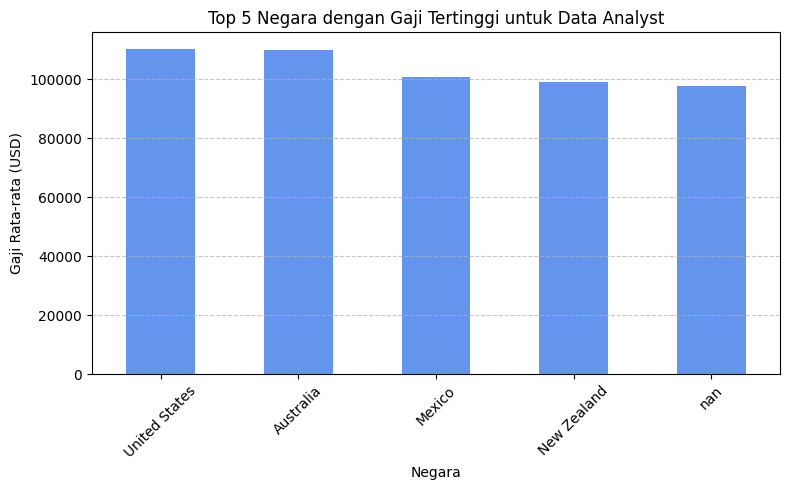

In [29]:
# Filter data untuk Data Analyst
title = "Data Analyst"

# Hitung rata-rata gaji per negara (tanpa menghapus Israel dulu)
avg_salary_da = (
    df[df['job_title'] == title]
    .groupby('company_location')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
)

# Hapus negara Israel (kode: IL)
avg_salary_da = avg_salary_da.drop('IL', errors='ignore')

# Ambil 5 negara teratas setelah drop
top_countries_da = avg_salary_da.head(5)

# Ubah kode negara menjadi nama lengkap
top_countries_da.index = top_countries_da.index.map(country_name)

# Visualisasi
plt.figure(figsize=(8, 5))
top_countries_da.plot(kind='bar', color='cornflowerblue')
plt.title(f"Top 5 Negara dengan Gaji Tertinggi untuk {title}")
plt.xlabel("Negara")
plt.ylabel("Gaji Rata-rata (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-30-966800411.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('company_location')['salary_in_usd']


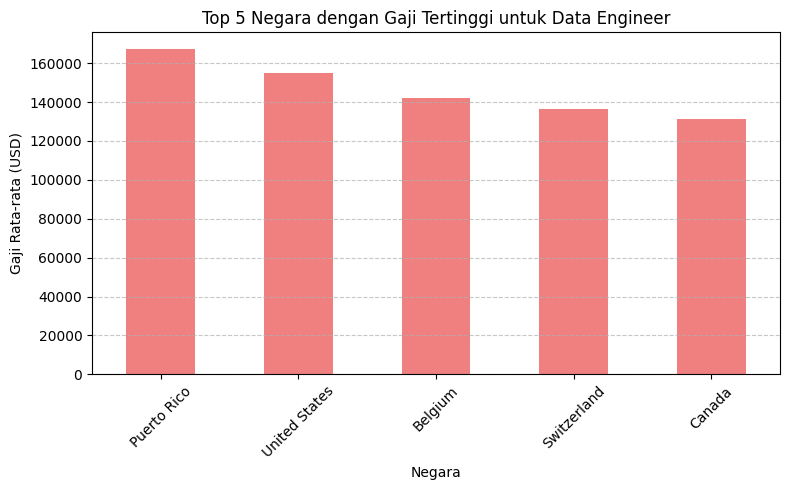

In [30]:
# Filter data untuk Data Engineer
title = "Data Engineer"
top_countries_de = (
    df[df['job_title'] == title]
    .groupby('company_location')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

# Ubah kode negara menjadi nama lengkap
top_countries_de.index = top_countries_de.index.map(country_name)

# Visualisasi
plt.figure(figsize=(8, 5))
top_countries_de.plot(kind='bar', color='lightcoral')
plt.title(f"Top 5 Negara dengan Gaji Tertinggi untuk {title}")
plt.xlabel("Negara")
plt.ylabel("Gaji Rata-rata (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()